
# Métodos iterativos estacionarios: Jacobi y Gauss-Seidel

**Objetivo general**
- Comparar los métodos de Jacobi y Gauss-Seidel para la solución de sistemas de ecuaciones lineales y comprender las ventajas y desventajas de cada uno.

**Objetivos particulares**
- Implementar el método de Jacobi y resolver un problema.
- Implementar el método de Gauss-Seidel y resolver un problema.
- Comparar ambos métodos y decidir cuál de ellos usar para un problema dado.

 <p xmlns:cc="http://creativecommons.org/ns#" xmlns:dct="http://purl.org/dc/terms/"><a property="dct:title" rel="cc:attributionURL" href="https://github.com/luiggix/intro_MeIA_2023">MACTI NOTES</a> by <span property="cc:attributionName">Luis Miguel de la Cruz Salas</span> is licensed under <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/?ref=chooser-v1" target="_blank" rel="license noopener noreferrer" style="display:inline-block;">CC BY-NC-SA 4.0<img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/cc.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/by.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/nc.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/sa.svg?ref=chooser-v1"></a></p> 

<a name='1'></a>
## Sistema positivo definido

Considere el siguiente sistema de ecuaciones:

$$
\begin{array}{ccc}
3x_0 + 2x_1 & = &2 \\
2x_0 + 6x_1 & = &-8
\end{array} \Longrightarrow
\left[
\begin{array}{cc}
3 & 2 \\
2 & 6
\end{array} \right]
\left[
\begin{array}{cccc}
x_{0} \\
x_{1}
\end{array} \right] 
=
\left[
\begin{array}{c}
2\\ -8
\end{array}
\right] \tag{1}
$$

**¿Cómo podría comprobar que el sistema de es definido positivo?**

In [1]:
# Importación de las bibliotecas numpy y matplotlib
import numpy as np
import matplotlib.pyplot as plt
import macti.visual
from macti.SistemasLineales.eigen_fc import graficaPasosSolucion

from macti.evaluation import Quizz
quizz = Quizz('2', 'SMM', 'ejemplos')

---
<a name='ej-1'></a>
### **<font color="DodgerBlue">Ejercicio 1. Definir el sistema y resolverlo.</font>**

<font color="DarkBlue">Definir la matriz $A$, el vector $b$ y resolver el sistema.</font>

---

In [2]:
# Sistema lineal
# A = ...
# b = ...
# Resolver el sistema
# sol = ...

### BEGIN SOLUTION
A = np.array([[3, 2],[2,6]] )
b = np.array([2,-8])
sol = np.linalg.solve(A,b)

file_answer.write('1', A, 'Checa los elementos de la matriz A')
file_answer.write('2', b, 'Checa los elementos del vector b')
file_answer.write('3', sol, 'Checa el cálculo de la solución del sistema')
### END SOLUTION

print("Matriz A : \n",A)
print("Vector b : \n", b)
print("Solución del sistema : \n", sol)


Matriz A : 
 [[3 2]
 [2 6]]
Vector b : 
 [ 2 -8]
Solución del sistema : 
 [ 2. -2.]


In [3]:
quizz.eval_numeric('1', A)
quizz.eval_numeric('2', b)
quizz.eval_numeric('3', sol)

----------------------------------------
Tu resultado es correcto.
----------------------------------------
----------------------------------------
Tu resultado es correcto.
----------------------------------------
----------------------------------------
Tu resultado es correcto.
----------------------------------------


---
<a name='ej-2'></a>
### **<font color="DodgerBlue">Ejercicio 2. Graficar las líneas y la solución.</font>**

<font color="DarkBlue">Las ecuaciones $(1)$ se pueden escribir como sigue:</font>

$$
\begin{array}{ccc}
\dfrac{3}{2}x_0 + x_1 & = & \dfrac{2}{2} \\
\dfrac{2}{6}x_0 + x_1 & = & -\dfrac{8}{6}
\end{array} \Longrightarrow
\begin{array}{ccc}
y_0 = m_0 x + b_0 \\
y_1 = m_1 x + b_1
\end{array}
$$

donde
$$
\begin{array}{ccc}
m_0 = -\dfrac{3}{2} & b_0 = 1 \\
m_1 = -\dfrac{2}{6} & b_1 = -\dfrac{8}{6}
\end{array}
$$

<font color="DarkBlue">Realizar las gráficas de estas ecuaciones junto con el punto donde se cruzan. </font>

---

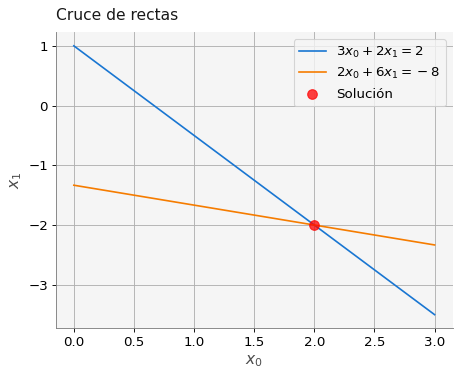

In [4]:
# Dominio en x
x = np.linspace(0,3,20)

# Parámetros de las rectas
#m0 = ...
#b0 = ...
#m1 = ...
#b1 = ...
# Ecuaciones de las rectas
#y0 = ...
#y1 = ...

### BEGIN SOLUTION
# Parámetros de las rectas
m0 = -3/2
b0 = 1
m1 = -2/6
b1 = -8/6
# Ecuaciones de las rectas
y0 = m0 * x + b0
y1 = m1 * x + b1

file_answer.write('4', y0, 'Checa la fórmula de la recta y0 y sus parámetros (m y b)')
file_answer.write('5', y1, 'Checa la fórmula de la recta y1 y sus parámetros (m y b)')
### END SOLUTION

#Gráficas
plt.plot(x,y0,label = '$3x_0+2x_1=2$')
plt.plot(x,y1,label = '$2x_0+6x_1=-8$')
plt.scatter(sol[0], sol[1], c='red', s = 75, alpha=0.75, zorder=5, label='Solución')

plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.title('Cruce de rectas')
plt.legend()
plt.grid()
plt.show()

In [5]:
quizz.eval_numeric('4', y0)
quizz.eval_numeric('5', y1)

----------------------------------------
Tu resultado es correcto.
----------------------------------------
----------------------------------------
Tu resultado es correcto.
----------------------------------------


<a name='2'></a>
## Método de Jacobi

Para entender el método veamos el siguiente ejemplo:

<a name='2-1'></a>
### Ejemplo 1
Consideremos el siguiente sistema de ecuaciones:

$$
\begin{align}
2x -y &= 9\\
x +6y -2z &= 15\\
4x -3y +8z &= 1\\
\end{align}
$$

El algoritmo de Jacobi se basa en despejar $x$ de la primera ecuación, $y$ de la segunda y $z$ de la tercera, de tal manera que obtenemos:

$$
\begin{align}
x  &= (9 +y )/2\\
y  &= (15 -x +2z)/6 \tag{2}\\
z &= (1-4x+3y)/8\\
\end{align}
$$

Consideramos el lado izquierdo de estas ecuaciones como las incógnitas y el lado derecho como conocido, por esa razón usaremos los super índices $k-1$ para lo que se conoce (de la iteración anterior) y $k$ para las incógnitas. Entonces sistema $(2)$ los escribimos como sigue:

$$
\begin{align}
x^{k} &= (9 + y^{k-1} )/2\\
y^{k} &= (15 - x^{k-1} + 2 z^{k-1})/6 \tag{3}\\
z^{k} &= (1 - 4 x^{k-1}+3 y^{k-1})/8\\
\end{align}
$$

El sistema $(3)$ representa las fórmulas iterativas del método de Jacobi y se van a usar para ir aproximando la solución paso a paso. 

Para la primera iteración, $k=1$, elegimos una solución inicial aproximada: $(x^0, y^0, z^0) = (0,0,0)$ y sustituimos para obtener lo siguiente:

$$
\begin{align}
x^1 &= (9 +0 )/2\\
y^1 &= (15 -0 +2(0))/6\\
z^1 &= (1-4(0)+3(0))/8\\
\end{align}
$$

$$\Longrightarrow (x^1, y^1, z^1) = (4.5,2.5,0.125)$$

Continuamos a la siguiente iteración para $k=2$:

$$
\begin{align}
x^2 &= (9 + (2.5)/2\\
y^2 &= (15 -4.5 +2(0.125))/6\\
z^2 &= (1-4(4.5)+3(2.5))/8\\
\end{align}
$$

$$\Longrightarrow (x^2, y^2, z^2) = (5.75,1.7916,-1.1875)$$.

Este procedimiento se continua hasta parar en alguna iteración. En este caso las aproximaciones deberían converger en la solución $(5,1,-2)$.

<a name='2-2'></a>
### Algoritmo 1.
En general, podemos definir el siguiente algoritmo para el método de Jacobi.
<center>
<img src="./Jacobi.png"  width='500px'/>
</center>

<a name='2-3'></a>
### Implementación 1.

En la celda siguiente se muestra el código del método de Jacobi

In [6]:
def jacobi(A,b,tol,kmax,xini):
    N = len(b)
    xnew = np.zeros(N)
    xold = np.zeros(N)
    
    # Solución inicial
    xold[0] = xini[0][0]
    xold[1] = xini[1][0]
    
    error = 10
    k = 0
    print('{:^2} {:^10} {:^12} {:^12}'.format(' i ', 'Error', 'x0', 'x1'))
    while(error > tol and k < kmax) :
        for i in range(0,N): # se puede hacer en paralelo
            xnew[i] = 0
            for j in range(0,i):
                xnew[i] += A[i,j] * xold[j]
            for j in range(i+1,N):
                xnew[i] += A[i,j] * xold[j]                
            xnew[i] = (b[i] - xnew[i]) / A[i,i]
        
        # Almacenamos la solución actual
        xini[0].append(xnew[0])
        xini[1].append(xnew[1])
        
        error = np.linalg.norm(xnew-xold,1)
        k += 1
        xold[:] = xnew[:]
        print('{:2d} {:10.9f} ({:10.9f}, {:10.9f})'.format(k, error, xnew[0], xnew[1]))
    return xnew, error, k

---
<a name='ej-3'></a>
### **<font color="DodgerBlue">Ejercicio 3. Aplicación del método de Jacobi.</font>**

<font color="DarkBlue"> Haciendo uso de la función `jacobi` definida en la celda superior, aproxima la solución del sistema de ecuaciones del Ejercicio 1. Utiliza la solución inicial `xini` = $(0, 0)$, una tolerancia `tol` = $1 \times 10^{-5}$ y `kmax` = $100$ iteraciones. Guarda la solución aproximada que devuelve la función en `solucion`.</font>
    
---

In [7]:
# Solución inicial
#xini = ...
# Método de Jacobi
#solucion, error, it = ...

### BEGIN SOLUTION
# Solución inicial
xini = [[0],[0]]
# Método de Jacobi
solucion, error, it = jacobi(A, b, 1e-5, 100, xini)

file_answer.write('6', solucion, 'Checa el cálculo de la solución en el algoritmo de Jacobi')
file_answer.write('7', error, 'Checa el cálculo del error en el algoritmo de Jacobi')
file_answer.write('8', it, 'Checa el número de iteraciones realizadas por el algoritmo de Jacobi')
### END SOLUTION

 i    Error         x0           x1     
 1 2.000000000 (0.666666667, -1.333333333)
 2 1.111111111 (1.555555556, -1.555555556)
 3 0.444444444 (1.703703704, -1.851851852)
 4 0.246913580 (1.901234568, -1.901234568)
 5 0.098765432 (1.934156379, -1.967078189)
 6 0.054869684 (1.978052126, -1.978052126)
 7 0.021947874 (1.985368084, -1.992684042)
 8 0.012193263 (1.995122695, -1.995122695)
 9 0.004877305 (1.996748463, -1.998374232)
10 0.002709614 (1.998916154, -1.998916154)
11 0.001083846 (1.999277436, -1.999638718)
12 0.000602136 (1.999759145, -1.999759145)
13 0.000240855 (1.999839430, -1.999919715)
14 0.000133808 (1.999946477, -1.999946477)
15 0.000053523 (1.999964318, -1.999982159)
16 0.000029735 (1.999988106, -1.999988106)
17 0.000011894 (1.999992071, -1.999996035)
18 0.000006608 (1.999997357, -1.999997357)


In [8]:
quizz.eval_numeric('6', solucion)
quizz.eval_numeric('7', error)
quizz.eval_numeric('8', it)

----------------------------------------
Tu resultado es correcto.
----------------------------------------
----------------------------------------
Tu resultado es correcto.
----------------------------------------
----------------------------------------
Tu resultado es correcto.
----------------------------------------


Una vez que la celda superior se ejecute de manera correcta (que pase la prueba), ejecuta la siguiente celda de
código para que veas la gráfica correspondiente a la aproximación de la solución de este sistema usando el método
iterativo de Jacobi.

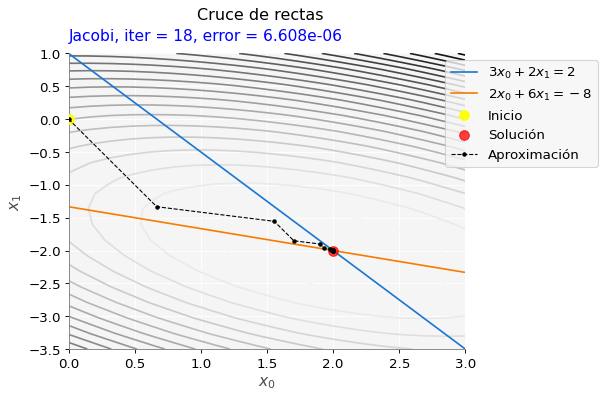

In [9]:
graficaPasosSolucion(x, y0, y1, xini, A, b, solucion, 'Jacobi, iter = {}, error = {:4.3e}'.format(it, error) )

<a name='3'></a>
## Método Gauss-Seidel

Este método se explica en el siguiente ejemplo:

<a name='3-1'></a>
### Ejemplo 2

Consideremos el mismo sistema de ecuaciones del ejemplo 1, despejamos las incógnitas de manera similar para obtener nuevamente el sistema $(2)$ que reescribimos aquí:

$$
\begin{align}
x  &= (9 +y )/2\\
y  &= (15 -x +2z)/6 \tag{2}\\
z &= (1-4x+3y)/8\\
\end{align}
$$

Nuevamente consideramos el lado izquierdo de estas ecuaciones como las incógnitas y el lado derecho como conocido, y otra vez usamos el super índice $k-1$ para lo que se conoce y el super índice $k$ para las incógnitas. 

El cambio con respecto al método de Jacobi es que, una vez que se obtiene $x^{k}$, este valor se utiliza en la evaluación de las siguientes dos ecuaciones; y una vez que se obtiene $y^{k}$, este valor se utiliza en la última ecuación, de tal manera que ahora tenemos lo siguiente:

$$
\begin{align}
x^{k} &= (9 + y^{k-1} )/2\\
y^{k} &= (15 - x^{k} + 2 z^{k-1})/6 \tag{4}\\
z^{k} &= (1 - 4 x^{k}+3 y^{k})/8\\
\end{align}
$$

El sistema $(4)$ representa las fórmulas iterativas del método de Gauss-Seidel y se van a usar para ir aproximando la solución paso a paso. 

Para la primera iteración $k=1$ elegimos una solución inicial aproximada: $(x^0, y^0, z^0) = (0,0,0)$ y sustituimos para obtener lo siguiente:

$$
\begin{align}
x^1 &= (9 +0 )/2 = 4.5\\
y^1 &= (15 -4.5 +2(0))/6 = 1.75\\
z^1 &= (1-4(4.5)+3(1.75))/8 = -1.46\\
\end{align}
$$

$$\Longrightarrow (x^1, y^1, z^1) = (4.5,1.75,-1.46)$$

Para la siguiente iteración $k=2$ tenemos:

$$
\begin{align}
x^2 &= (9 + (4.5)/2 = 5.375\\
y^2 &= (15 -5.375 +2(-1.46))/6 = 1.11\\
z^2 &= (1-4(5.375)+3(1.11))/8 = -2.14\\
\end{align}
$$

$$\Longrightarrow (x^2, y^2, z^2) = (5.375,1.11,-2.14)$$

Se realiza el procedimiento recursivamente hasta parar en alguna iteración. En este caso las aproximaciones deben converger en el punto $(5,1,-2)$, pero más rápido que con el método de Jacobi.

<a name='3-2'></a>
### Algoritmo 2.
En general, podemos definir el siguiente algoritmo para el método de Gauss-Seidel.

<center>
<img src="./Gauss_Seidel.png"  width='500px'/>
</center>

<a name='3-3'></a>
### Implementación 2.

A continuación se muestra el código para el método iterativo de Gauss-Seidel

In [10]:
def gauss_seidel(A,b,tol,kmax,xini):
    N = len(b)
    xnew = np.zeros(N)
    xold = np.zeros(N)
    
    # Solución inicial
    xold[0] = xini[0][0]
    xold[1] = xini[1][0]
    
    error = 10
    k = 0
    print('{:^2} {:^10} {:^12} {:^12}'.format(' i ', 'Error', 'x0', 'x1'))
    while(error > tol and k < kmax) :
        for i in range(0,N): # se puede hacer en paralelo
            xnew[i] = 0
            for j in range(0,i):
                xnew[i] += A[i,j] * xnew[j]
            for j in range(i+1,N):
                xnew[i] += A[i,j] * xold[j]                
            xnew[i] = (b[i] - xnew[i]) / A[i,i]
            
        # Almacenamos la solución actual
        xini[0].append(xnew[0])
        xini[1].append(xnew[1])
        
        error = np.linalg.norm(xnew-xold)
        k += 1
        xold[:] = xnew[:]
        print('{:2d} {:10.9f} ({:10.9f}, {:10.9f})'.format(k, error, xnew[0], xnew[1]))
    return xnew, error, k

---
<a name='ej-4'></a>
### **<font color="DodgerBlue">Ejercicio 4. Aplicación del método de Gauss-Seidel.</font>**

<font color="DarkBlue">Haciendo uso de la función `gauss_seidel` definida en la celda superior, aproxima la solución del sistema de ecuaciones del Ejercicio 1. Utiliza la solución inicial `xini` = $(0, 0)$, una tolerancia `tol` = $1 \times 10^{-5}$ y `kmax` = $100$ iteraciones. Guarda la solución aproximada que devuelve la función en `solucion`.</font>
    
---

In [11]:
# Solución inicial
#xini = ...
# Método de Gauss-Seidel
#solucion, error, it = ...

### BEGIN SOLUTION
# Solución inicial
xini = [[0],[0]]
# Método de Gauss-Seidel
solucion, error, it = gauss_seidel(A, b, 1e-5, 100, xini)

file_answer.write('9', solucion, 'Checa el cálculo de la solución en el algoritmo de Gauss-Seidel')
file_answer.write('10', error, 'Checa el cálculo del error en el algoritmo de Gauss-Seidel')
file_answer.write('11', it, 'Checa el número de iteraciones realizadas por el algoritmo de Gauss-Seidel')
### END SOLUTION

 i    Error         x0           x1     
 1 1.692394024 (0.666666667, -1.555555556)
 2 1.093133018 (1.703703704, -1.901234568)
 3 0.242918449 (1.934156379, -1.978052126)
 4 0.053981877 (1.985368084, -1.995122695)
 5 0.011995973 (1.996748463, -1.998916154)
 6 0.002665772 (1.999277436, -1.999759145)
 7 0.000592394 (1.999839430, -1.999946477)
 8 0.000131643 (1.999964318, -1.999988106)
 9 0.000029254 (1.999992071, -1.999997357)
10 0.000006501 (1.999998238, -1.999999413)


In [12]:
quizz.eval_numeric('9', solucion)
quizz.eval_numeric('10', error)
quizz.eval_numeric('11', it)

----------------------------------------
Tu resultado es correcto.
----------------------------------------
----------------------------------------
Tu resultado es correcto.
----------------------------------------
----------------------------------------
Tu resultado es correcto.
----------------------------------------


Una vez que la celda superior se ejecute de manera correcta (que pase la prueba), ejecuta la siguiente celda de
código para que veas la gráfica correspondiente a la aproximación de la solución de este sistema usando el método
iterativo de Gauss-Seidel.

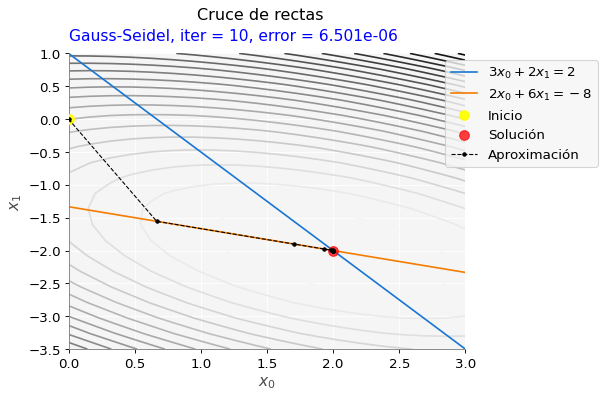

In [13]:
graficaPasosSolucion(x, y0, y1, xini, A, b, solucion, 'Gauss-Seidel, iter = {}, error = {:4.3e}'.format(it,error))

---
<a name='ej-5'></a>
## **<font color="DodgerBlue">Ejercicio 5. Resolver el sistema de ecuaciones de la práctica de la Pre-clase.</font>**

<font color="DarkBlue"> Intente resolver el sistema de ecuaciones definido en el primer ejercicio de la Pre-clase usando los métodos de Jacobi y de Gauss-Seidel. Describe que pasa en cada caso. Busque una solución inicial que le permita obtener la solución. Haga solo unas cuantas iteraciones (2 a 5) y grafique los resultados.
En caso de que no logre obtener una solución adecuada, discuta con su equipo las razones de lo anterior y luego exprese sus puntos de vista en la sala general.</font>
    
---

In [14]:
# Megabytes desde 0 hasta 1500 (1.5 GB)
x = np.linspace(0,1500,10)

# Fórmulas de cada compañía
#PA = ...
#PB = ...
# Sistema lineal
#A = ...
#b = ...
# Solución inicial
#xini = ...
# Método de Jacobi
#solucion, error, it = ...

### BEGIN SOLUTION
PA = 0.10 * x + 200
PB = 0.30 * x + 20

A = np.array([[0.10, -1.],[0.30,-1.]] )
b = np.array([-200.0,-20.0])

# Solución inicial
xini = [[900],[285]]
# Método de Jacobi
solucion, error, it = jacobi(A, b, 1e-5, 5, xini)

file_answer.write('12', solucion, 'Checa el cálculo de la solución en el algoritmo de Jacobi')
file_answer.write('13', error, 'Checa el cálculo del error en el algoritmo de Jacobi')
file_answer.write('14', it, 'Checa el número de iteraciones realizadas por el algoritmo de Jacobi')
### END SOLUTION

 i    Error         x0           x1     
 1 55.000000000 (850.000000000, 290.000000000)
 2 65.000000000 (900.000000000, 275.000000000)
 3 165.000000000 (750.000000000, 290.000000000)
 4 195.000000000 (900.000000000, 245.000000000)
 5 495.000000000 (450.000000000, 290.000000000)


In [15]:
quizz.eval_numeric('12', solucion)
quizz.eval_numeric('13', error)
quizz.eval_numeric('14', it)

----------------------------------------
Tu resultado es correcto.
----------------------------------------
----------------------------------------
Tu resultado es correcto.
----------------------------------------
----------------------------------------
Tu resultado es correcto.
----------------------------------------


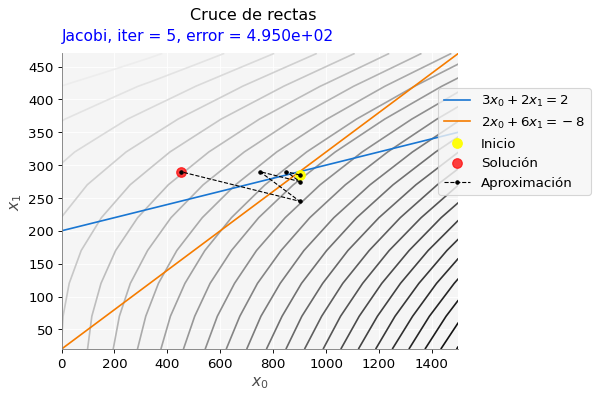

In [16]:
graficaPasosSolucion(x, PA, PB, xini, A, b, solucion, 'Jacobi, iter = {}, error = {:4.3e}'.format(it,error))

<div class="alert alert-danger">

**NOTA**: Observa que aunque el resultado numérico dice ser correcto, las iteraciones no convergen a la solución. **¿A qué crees que se deba?**
    
</div>

In [17]:
### BEGIN SOLUTION
# Solución inicial
xini = [[900],[285]]
# Método de Jacobi
solucion, error, it = gauss_seidel(A, b, 1e-5, 5, xini)

file_answer.write('15', solucion, 'Checa el cálculo de la solución en el algoritmo de Gauss-Seidel')
file_answer.write('16', error, 'Checa el cálculo del error en el algoritmo de Gauss-Seidel')
file_answer.write('17', it, 'Checa el número de iteraciones realizadas por el algoritmo de Gauss-Seidel')
### END SOLUTION

 i    Error         x0           x1     
 1 50.990195136 (850.000000000, 275.000000000)
 2 104.403065089 (750.000000000, 245.000000000)
 3 313.209195267 (450.000000000, 155.000000000)
 4 939.627585802 (-450.000000000, -115.000000000)
 5 2818.882757406 (-3150.000000000, -925.000000000)


In [18]:
quizz.eval_numeric('15', solucion)
quizz.eval_numeric('16', error)
quizz.eval_numeric('17', it)

----------------------------------------
Tu resultado es correcto.
----------------------------------------
----------------------------------------
Tu resultado es correcto.
----------------------------------------
----------------------------------------
Tu resultado es correcto.
----------------------------------------


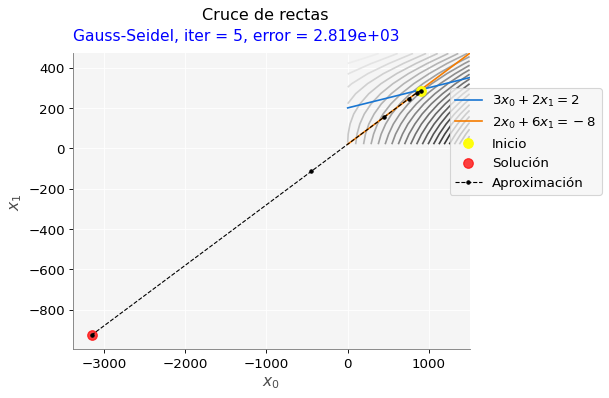

In [19]:
graficaPasosSolucion(x, PA, PB, xini, A, b, solucion, 'Gauss-Seidel, iter = {}, error = {:4.3e}'.format(it,error))

<div class="alert alert-danger">

**NOTA**: Observa que aunque el resultado numérico dice ser correcto, las iteraciones no convergen a la solución. **¿A qué crees que se deba?**
    
</div>